# Before your start:
Read the README.md file
- Comment as much as you can and 
- use the resources (README.md file)
- Happy learning!

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pandas.plotting import lag_plot
from statsmodels.tsa.stattools import adfuller
import warnings

# Setup
warnings.filterwarnings("ignore")

# Challenge 1 - Loading and Evaluating The Data

In [20]:
sensor = pd.read_excel(r'C:\Users\Utilisateur\Downloads\sub_1.xlsx')
sensor

,Unnamed: 0,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1746,1746,1.797120,-0.562324,2.445889,0.824443,0.533154,0.189844,-0.123211,0.909536,-0.379757,-0.268367,0.006733,-0.064874
1747,1747,1.814297,-0.569719,2.449655,0.817212,0.539396,0.203020,-0.057641,0.723118,-0.437812,-0.102444,-0.060666,-0.229738
1748,1748,1.830821,-0.578367,2.447967,0.809207,0.546658,0.215288,0.343238,0.997236,-0.338155,-0.085590,-0.030209,-0.087740
1749,1749,1.849557,-0.586962,2.439458,0.800485,0.553834,0.229110,0.470144,1.227937,-0.332223,-0.048105,0.029555,0.060441


Examine the data using the head function.

In [21]:
sensor.head()

,Unnamed: 0,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [22]:
sensor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1751 entries, 0 to 1750
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1751 non-null   int64  
 1   attitude.roll       1751 non-null   float64
 2   attitude.pitch      1751 non-null   float64
 3   attitude.yaw        1751 non-null   float64
 4   gravity.x           1751 non-null   float64
 5   gravity.y           1751 non-null   float64
 6   gravity.z           1751 non-null   float64
 7   rotationRate.x      1751 non-null   float64
 8   rotationRate.y      1751 non-null   float64
 9   rotationRate.z      1751 non-null   float64
 10  userAcceleration.x  1751 non-null   float64
 11  userAcceleration.y  1751 non-null   float64
 12  userAcceleration.z  1751 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 178.0 KB


How many rows and columns are in our data?

In [9]:
data.isnull().values.any()
# there is 1751 rows

False

To perform time series analysis on the data, we must change the index from a range index to a time series index. 
In the cell below, create a time series index using the pd.date_range function. 
Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10.
The number of periods is equal to the number of rows in sensor. The frequency should be set to infer.

In [27]:
index_ = pd.date_range(start='1/1/2018 00:00:00', end='1/1/2018 00:29:10', periods=len(sensor))
index_

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:00:01',
               '2018-01-01 00:00:02', '2018-01-01 00:00:03',
               '2018-01-01 00:00:04', '2018-01-01 00:00:05',
               '2018-01-01 00:00:06', '2018-01-01 00:00:07',
               '2018-01-01 00:00:08', '2018-01-01 00:00:09',
               ...
               '2018-01-01 00:29:01', '2018-01-01 00:29:02',
               '2018-01-01 00:29:03', '2018-01-01 00:29:04',
               '2018-01-01 00:29:05', '2018-01-01 00:29:06',
               '2018-01-01 00:29:07', '2018-01-01 00:29:08',
               '2018-01-01 00:29:09', '2018-01-01 00:29:10'],
              dtype='datetime64[ns]', length=1751, freq=None)

Assign the time series index to the dataframe's index.

In [29]:
sensor.index = pd.to_datetime(index_)
sensor

,Unnamed: 0,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
2018-01-01 00:00:00,0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
2018-01-01 00:00:01,1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2018-01-01 00:00:02,2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
2018-01-01 00:00:03,3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
2018-01-01 00:00:04,4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-01 00:29:06,1746,1.797120,-0.562324,2.445889,0.824443,0.533154,0.189844,-0.123211,0.909536,-0.379757,-0.268367,0.006733,-0.064874
2018-01-01 00:29:07,1747,1.814297,-0.569719,2.449655,0.817212,0.539396,0.203020,-0.057641,0.723118,-0.437812,-0.102444,-0.060666,-0.229738
2018-01-01 00:29:08,1748,1.830821,-0.578367,2.447967,0.809207,0.546658,0.215288,0.343238,0.997236,-0.338155,-0.085590,-0.030209,-0.087740
2018-01-01 00:29:09,1749,1.849557,-0.586962,2.439458,0.800485,0.553834,0.229110,0.470144,1.227937,-0.332223,-0.048105,0.029555,0.060441


Our next step is to decompose the time series and evaluate the patterns in the data.
Load the statsmodels.api submodule and plot the decomposed plot of userAcceleration.x.
Set freq=60 in the seasonal_decompose function. Your graph should look like the one below.

In [31]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline

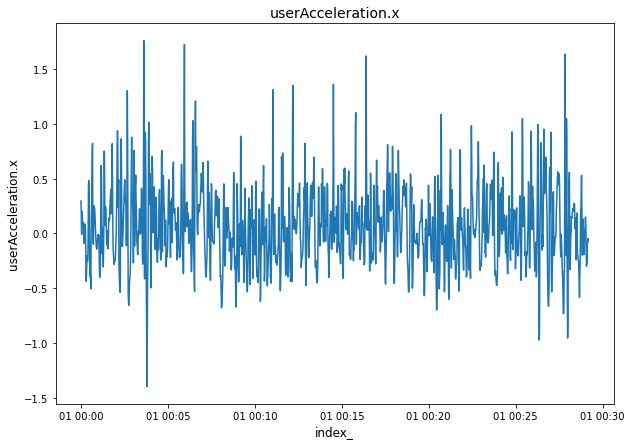

In [34]:
plt.figure(figsize=(10, 7))
plt.plot(sensor['userAcceleration.x'])
plt.title('userAcceleration.x', fontsize=14)
plt.xlabel('index_', fontsize=12)
plt.ylabel('userAcceleration.x', fontsize=12)
plt.show()

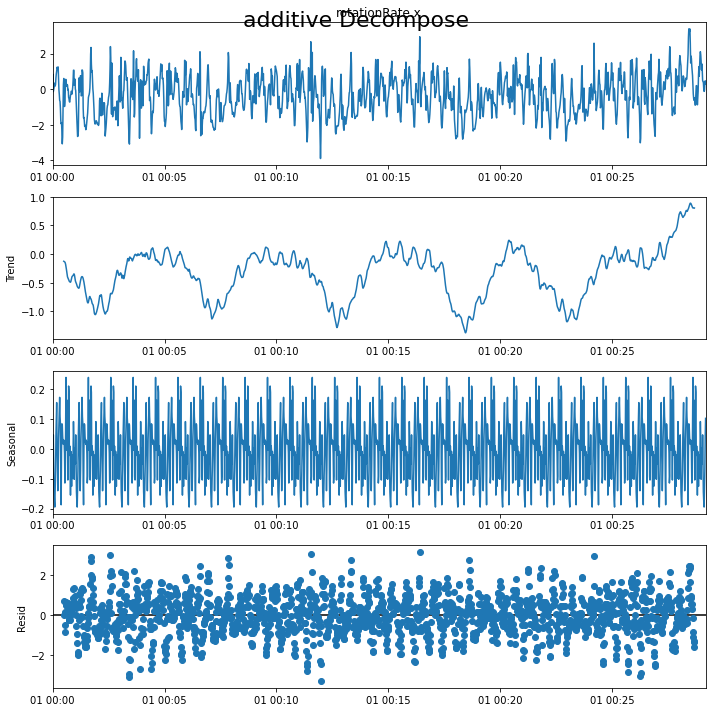

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
# Import Dataon
result_mul = seasonal_decompose(sensor['rotationRate.x'], model='additive', freq=60) #just the colums and the model mutiplicative
# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('additive Decompose', fontsize=22)
plt.show()

Plot the decomposed time series of rotationRate.x also with a frequency of 60.

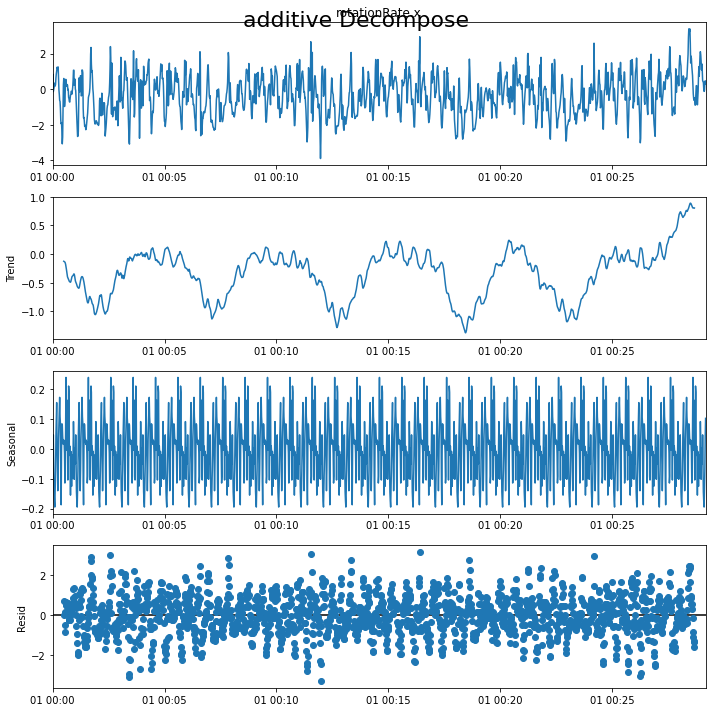

In [36]:
# Import Dataon
result_mul = seasonal_decompose(sensor['rotationRate.x'], model='additive', freq=60) #just the colums and the model mutiplicative
# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('additive Decompose', fontsize=22)
plt.show()

# Challenge 2 - Modelling the Data

To model our data, we should look at a few assumptions. First, let's plot the lag_plot to detect any autocorrelation. Do this for userAcceleration.x.

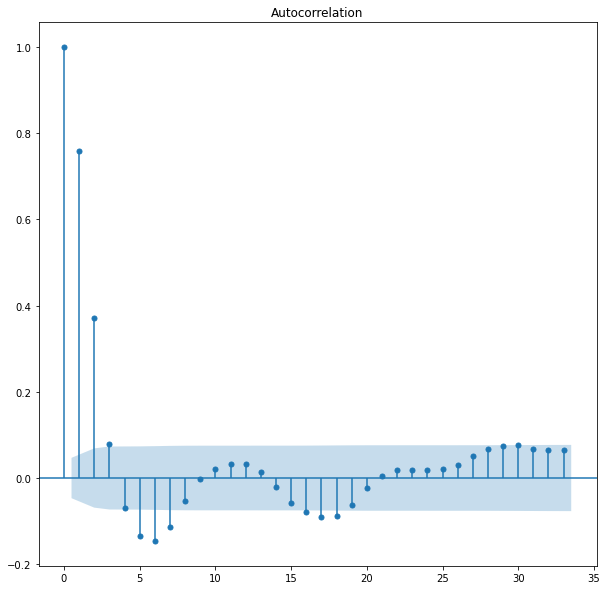

In [41]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
# Calculate the ACF (via statsmodel)
plot_acf(sensor['userAcceleration.x'])
# Show the data as a plot (via matplotlib)
plt.show() 

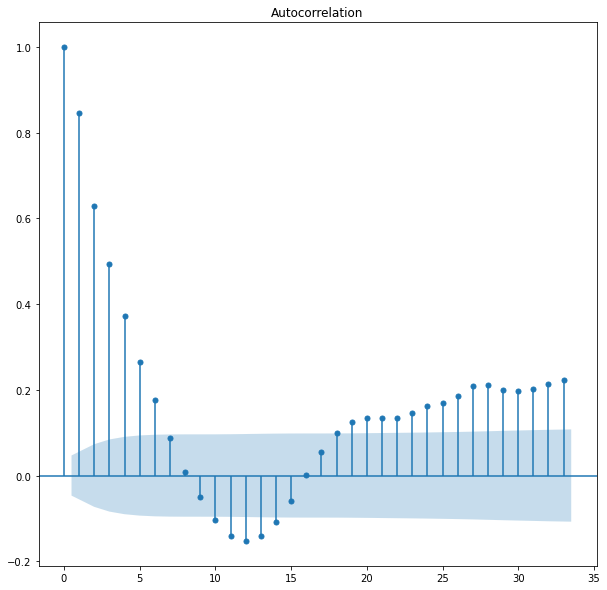

In [42]:
# Calculate the ACF (via statsmodel)
plot_acf(sensor['rotationRate.x'])
# Show the data as a plot (via matplotlib)
plt.show() 

In [43]:
X = data['userAcceleration.x']
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:] # on divise les periodes, mean et mariave differents: donc non stationarity
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=0.063430, mean2=0.061555
variance1=0.122852, variance2=0.113650


In [44]:
# Import adfuller
from statsmodels.tsa.stattools import adfuller

result = adfuller(data['userAcceleration.x'])
print('ADF Test Statistic: %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[4]['5%'])
print('p-value: %.2f' % result[1])

ADF Test Statistic: -17.96
5% Critical Value: -2.86
p-value: 0.00


In [45]:
we rejet that it is not stationnary - so it is stationnary

SyntaxError: invalid syntax (Temp/ipykernel_14304/2047795393.py, line 1)

In [49]:
from statsmodels.tsa.arima_model import ARMA
index= data.shape[0]-10
train, test = sensor['userAcceleration.x'][0:index], data['userAcceleration.x'][index:]

In [50]:
model = ARMA(train, order=(2,1))
result = model.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:     userAcceleration.x   No. Observations:                 1741
Model:                     ARMA(2, 1)   Log Likelihood                 373.401
Method:                       css-mle   S.D. of innovations              0.195
Date:                Tue, 18 Jan 2022   AIC                           -736.803
Time:                        17:54:01   BIC                           -709.492
Sample:                    01-01-2018   HQIC                          -726.704
                         - 01-01-2018                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.0637      0.014      4.503      0.000       0.036       0.091
ar.L1.userAcceleration.x     0.9882      0.044     22.639      0.000       0.903       1.074
ar.L2.userAcceleration.x    -0.3788      0.037    -10.180      0.000      -0.452      -0.306
ma.L1.userAcceleration.x     0.1823      0.046      3.935      0.000       0.092       0.273
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3044           -0.9687j            1.6248           -0.1017
AR.2            1.3044           +0.9687j            1.6248            0.1017
MA.1           -5.4842           +0.0000j            5.4842            0.5000
-----------------------------------------------------------------------------
"""

In [51]:
from statsmodels.tools.eval_measures import rmse
# prediction:
pred=result.predict(test.index[0], test.index[-1])

In [52]:
# calc rmse
rmse = rmse(test, pred)
rmse

0.22529864990832735

In [53]:
from statsmodels.tools.eval_measures import rmse